<a href="https://colab.research.google.com/github/gmauricio-toledo/MetodosNumericos/blob/main/EDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# El método de Heun

In [14]:
import numpy as np

def f(x,y):
    return (1+4*x)*np.sqrt(y)

def sol(x):
    return 0.25*(x+2*x**2+2)**2

def error_relativo(valor_real,valor_aproximado):
    return np.abs((valor_real-valor_aproximado)/valor_real)

In [15]:
def heun(a,b,y0,f,h,sol):
    n = int((b-a)/h)
    xs = np.linspace(a,b,n+1)
    ys = np.zeros_like(xs)
    ys[0] = y0
    for j in range(1,n+1):
        predictor = ys[j-1] + h*f(xs[j-1],ys[j-1])
        ys[j] = ys[j-1] + h*(f(xs[j-1],ys[j-1])+f(xs[j],predictor))/2
    valores_reales = np.array([sol(x) for x in xs])
    errores = error_relativo(valores_reales,ys)    
    return {'xs': xs,
            'ys': ys,
            'y_reales': valores_reales,
            'errores': errores}

In [16]:
solucion = heun(0,1,1,f,0.01,sol)
print(solucion)

{'xs': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ]), 'ys': array([1.        , 1.01022594, 1.020908  , 1.03205256, 1.04366621,
       1.05575579, 1.06832838, 1.0813913 , 1.0949521 , 1.1090186 ,
       1.12359882, 1.13870105, 1.1543338 , 1.17050583, 1.18722616,
       1.204504  , 1.22234885, 1.24077041, 1.25977866, 1.27938379,
       1.29959624, 1.32042668, 1.34188605

In [8]:
solucion['xs']

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

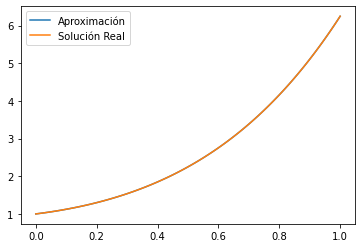

In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(solucion['xs'],solucion['ys'],label='Aproximación')
plt.plot(solucion['xs'],solucion['y_reales'],label='Solución Real')
plt.legend()
plt.show()